In [5]:
import os
from os.path import exists, join, basename, splitext

# TODO: change URL to your fork of my repository if necessary.
git_repo_url = 'https://github.com/open-mmlab/mmdetection'
%cd /mmdetections/
project_name = os.path.abspath(splitext(basename(git_repo_url))[0])
mmdetection_dir=project_name

[WinError 2] The system cannot find the file specified: '/mmdetections/'
C:\Users\Ganga\Documents\GitHub\mmlab-colab-objectdetection


In [7]:
mmdetection_dir

'C:\\Users\\Ganga\\Documents\\GitHub\\mmlab-colab-objectdetection\\mmdetection'

In [4]:
# clone "depth 1" will only get the latest copy of the relevant files.
!git clone -q --recurse-submodules --depth 1 $git_repo_url
print("Update mmdetection repo")
!cd {mmdetection_dir} && git checkout master && git pull
# dependencies
!pip install -q mmcv terminaltables
# build
!cd {mmdetection_dir} && python setup.py install
!pip install -r {os.path.join(mmdetection_dir, "requirements.txt")}

Update mmdetection repo
Your branch is up to date with 'origin/master'.
Already up to date.


Already on 'master'
The system cannot find the path specified.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'C:\\Users\\Ganga\\Documents\\GitHub\\mmlab-colab-objectdetection\\mmdetection\\requirements.txt'


In [1]:
import os
from os.path import exists, join, basename, splitext

# TODO: change URL to your fork of my repository if necessary.
git_repo_url = 'https://github.com/open-mmlab/mmdetection'
%cd mmdetections/
project_name = os.path.abspath(splitext(basename(git_repo_url))[0])
project_name
mmdetection_dir=project_name
mmdetection_dir

/content/mmdetections


'/content/mmdetections/mmdetection'

In [ ]:
import os
import sys
sys.path.append(mmdetection_dir)
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

# You can add more model configs like below.
MODELS_CONFIG = {
    'mask_rcnn_r50_fpn_1x': {
        'config_file': 'configs/mask_rcnn_r50_fpn_1x.py'
    },
    'cascade_mask_rcnn_r50_fpn_1x': {
        'config_file': 'configs/cascade_mask_rcnn_r50_fpn_1x.py',
    }
}

In [ ]:
# Pick the model you want to use
# Select a model in `MODELS_CONFIG`.
selected_model = 'mask_rcnn_r50_fpn_1x'  # 'cascade_mask_rcnn_r50_fpn_1x'

# Total training epochs.
total_epochs = 20

# Name of the config file.
config_file = MODELS_CONFIG[selected_model]['config_file']

In [4]:
# !pip install mmcv
!python --version

Python 3.6.9


In [5]:
import os
config_fname = os.path.join(project_name,  config_file)

assert os.path.isfile(config_fname), '`{}` not exist'.format(config_fname)
config_fname

'/content/mmdetections/mmdetection/configs/mask_rcnn_r50_fpn_1x.py'

In [7]:
import json
annotation_path = os.path.join("/content/mmdetections/","data", "military_coco_creation.json")
json_file = open(annotation_path)
coco = json.load(json_file)
print(coco["categories"])
classes_names = [category["name"] for category in coco["categories"]]
print(classes_names)

[{'id': 1, 'name': 'plane', 'supercategory': 'plane'}, {'id': 2, 'name': 'jeep', 'supercategory': 'jeep'}, {'id': 3, 'name': 'person', 'supercategory': 'person'}]
['plane', 'jeep', 'person']


In [8]:
%cd {project_name}

/content/mmdetections/mmdetection


In [19]:
import re
fname = config_fname
with open(fname) as f:
    s = f.read()
    work_dir = re.findall(r"work_dir = \'(.*?)\'", s)[0]
    # Update `num_classes` including `background` class.
    s = re.sub('num_classes=.*?,',
               'num_classes={},'.format(len(classes_names)), s)
    s = re.sub('total_epochs = \d+',
               'total_epochs = {} #'.format(total_epochs), s)
    if "MyDataset" in s:
        s = re.sub("data_root = '/content/data/'",
                   "data_root = 'data/'", s)
        s = re.sub("annotations/instances_train2017.json",
                   "military_coco_creation.json", s)
        s = re.sub("annotations/instances_val2017.json",
                   "military_coco_creation.json", s)
        s = re.sub("annotations/instances_val2017.json",
                   "military_coco_creation.json", s)
        s = re.sub("train2017", "shapes", s)
        s = re.sub("val2017", "shapes", s)
    else:
        s = re.sub('img_prefix=.*?\],',
                   "img_prefix=data_root + 'images',".format(total_epochs), s)
with open(fname, 'w') as f:
    f.write(s)
!cat {config_fname}

# model settings
model = dict(
    type='MaskRCNN',
    pretrained='torchvision://resnet50',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch'),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[.0, .0, .0, .0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.0),
        loss_bbox=dict(

In [17]:
!python /content/mmdetections/mmdetection/setup.py install

running install
running bdist_egg
running egg_info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writing top-level names to mmdet.egg-info/top_level.txt
/usr/local/lib/python3.6/dist-packages/torch/utils/cpp_extension.py:304: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
writing manifest file 'mmdet.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
copying mmdet/version.py -> build/lib.linux-x86_64-3.6/mmdet
copying mmdet/datasets/my_dataset.py -> build/lib.linux-x86_64-3.6/mmdet/datasets
copying mmdet/datasets/__init__.py -> build/lib.linux-x86_64-3.6/mmdet/datasets
running build_ext
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mmdet
cre

In [ ]:
# !python /content/mmdetections/mmdetection/tools/upgrade_model_version.py {config_fname} /content/mmdetections/mmdetection/work_dirs/mask_rcnn_r50_fpn_1x.py

In [12]:
{config_fname}

{'/content/mmdetections/mmdetection/configs/mask_rcnn_r50_fpn_1x.py'}

In [15]:
{project_name}

{'/content/mmdetections/mmdetection'}

In [20]:
!python -W ignore::UserWarning {project_name}/tools/train.py {config_fname}

2020-06-07 16:33:41,818 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.6.9 (default, Apr 18 2020, 01:56:04) [GCC 8.4.0]
CUDA available: True
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 10.1, V10.1.243
GPU 0: Tesla T4
GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
PyTorch: 1.5.0+cu101
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2019.0.5 Product Build 20190808 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v0.21.1 (Git Hash 7d2fd500bc78936d1d648ca713b901012f470dbc)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 10.1
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,code=sm_61;-gencode;arch=compute_70,code=sm_70;-gencode;arch=co

In [75]:
%cd {project_name}
checkpoint_file = os.path.join(work_dir, "latest.pth")
assert os.path.isfile(
    checkpoint_file), '`{}` not exist'.format(checkpoint_file)
checkpoint_file = os.path.abspath(checkpoint_file)
checkpoint_file

/content/mmdetections/mmdetection


'/content/mmdetections/mmdetection/work_dirs/mask_rcnn_r50_fpn_1x/latest.pth'

In [ ]:
import sys
sys.path.append('/content/mmdetections/mmdetection/mmdet')

In [ ]:
import mmdet

In [52]:
%cd {project_name}


/content/mmdetections/mmdetection


In [53]:
!python setup.py develop

running develop
running egg_info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writing top-level names to mmdet.egg-info/top_level.txt
/usr/local/lib/python3.6/dist-packages/torch/utils/cpp_extension.py:304: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
writing manifest file 'mmdet.egg-info/SOURCES.txt'
running build_ext
copying build/lib.linux-x86_64-3.6/mmdet/ops/utils/compiling_info.cpython-36m-x86_64-linux-gnu.so -> mmdet/ops/utils
copying build/lib.linux-x86_64-3.6/mmdet/ops/nms/nms_ext.cpython-36m-x86_64-linux-gnu.so -> mmdet/ops/nms
copying build/lib.linux-x86_64-3.6/mmdet/ops/roi_align/roi_align_ext.cpython-36m-x86_64-linux-gnu.so -> mmdet/ops/roi_align
copying build/lib.linux-x86_64-3.6/mmdet/ops/roi_pool/roi_pool_ext.cpyth

In [ ]:
from mmdet.models import build_detector
from mmdet.apis import inference_detector, show_result_pyplot, init_detector


In [ ]:
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

import mmcv
from mmcv.runner import load_checkpoint
import mmcv.visualization.image as mmcv_image
# fix for colab


def imshow(img, win_name='', wait_time=0): plt.figure(
    figsize=(50, 50)); plt.imshow(img)


mmcv_image.imshow = imshow

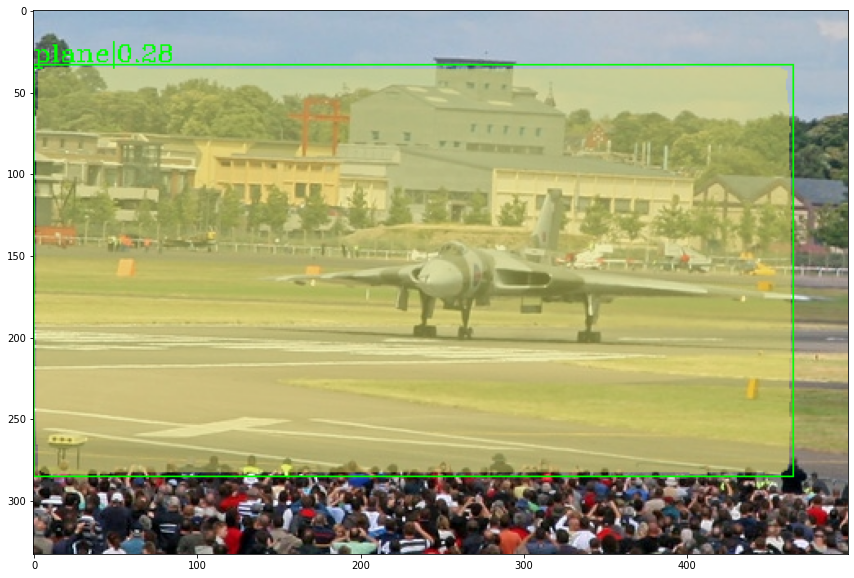

In [219]:
score_thr = 0.1

# build the model from a config file and a checkpoint file
model = init_detector(config_fname, checkpoint_file)

img = '/content/mmdetections/data/shapes/11.jpg'
result = inference_detector(model, img)

# # img = model.show_result(img, result, score_thr=score_thr, show=True)
img1=show_result_pyplot(model, img, result,score_thr=0.277, fig_size=(15, 10))

In [220]:
import time
import numpy as np
times = []
for i in range(20):
    start_time = time.time()
    result = inference_detector(model, img)
    delta = time.time() - start_time
    times.append(delta)
mean_delta = np.array(times).mean()
fps = 1 / mean_delta
print("Average(sec):{:.2f},fps:{:.2f}".format(mean_delta, fps))

Average(sec):0.15,fps:6.59


In [ ]:
import os
import random
import tqdm

from PIL import Image
import mmcv
from mmcv.runner import load_checkpoint
from mmdet.models import build_detector
from mmdet.apis import inference_detector, show_result_pyplot, init_detector
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import imageio
import numpy as np
import pandas as pd
import pickle
import cv2

In [ ]:
config_file
cfg = mmcv.Config.fromfile(config_fname)
checkpoint_file = checkpoint_file
model = init_detector(cfg, checkpoint_file)

In [78]:
model.CLASSES

('plane', 'jeep', 'person')

In [ ]:
def visualize(dirname, fname):
    path_img = os.path.join(dirname, fname)
    img = mmcv.imread(path_img)
    plt.figure(figsize=(34,14))
    plt.imshow(img)
    result = inference_detector(model, img)
    print(result[0][1])
    rects = []
    for idx_req_field in range(len(model.CLASSES)):
      if result[0][idx_req_field].any():
        class_name = model.CLASSES[idx_req_field]
        for i in result[0][idx_req_field]:
            if i[4]<0.277:
                continue
            x1, y1, x2, y2, prob = i
            print(x1, y1, x2, y2)
            print(class_name, prob)
            if i[4]<0.277:
                continue
            x1, y1, x2, y2 = i[:4]
            rect = Rectangle((x1,y1), x2-x1, y2-y1, facecolor=(np.random.rand(),np.random.rand(),np.random.rand(),0.5),lw=4, edgecolor=(np.random.rand(),np.random.rand(),np.random.rand()))
            rects.append(rect)
        p = PatchCollection(rects,match_original=True)
        fig, ax = plt.subplots(1,figsize=(34,14))
        ax.add_collection(p)
        ax.imshow(img)


[]
0.0 33.008926 465.75964 285.82135
plane 0.28342396


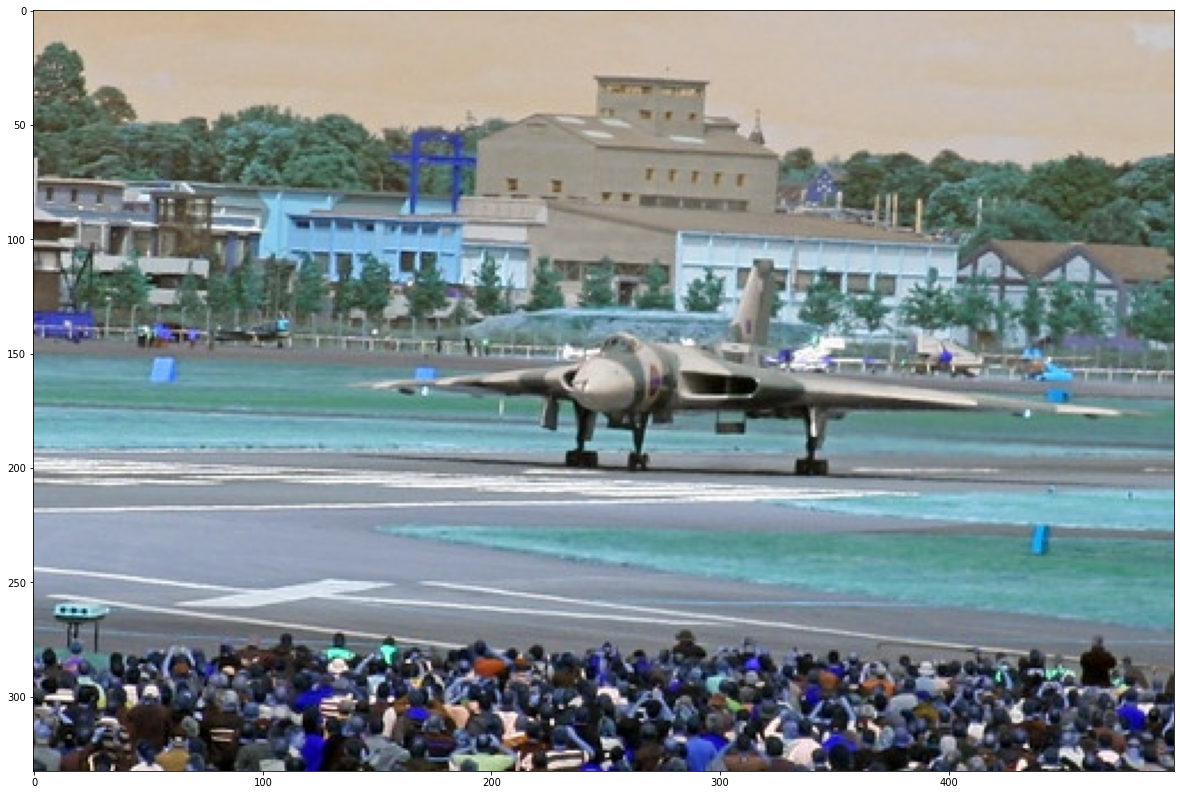

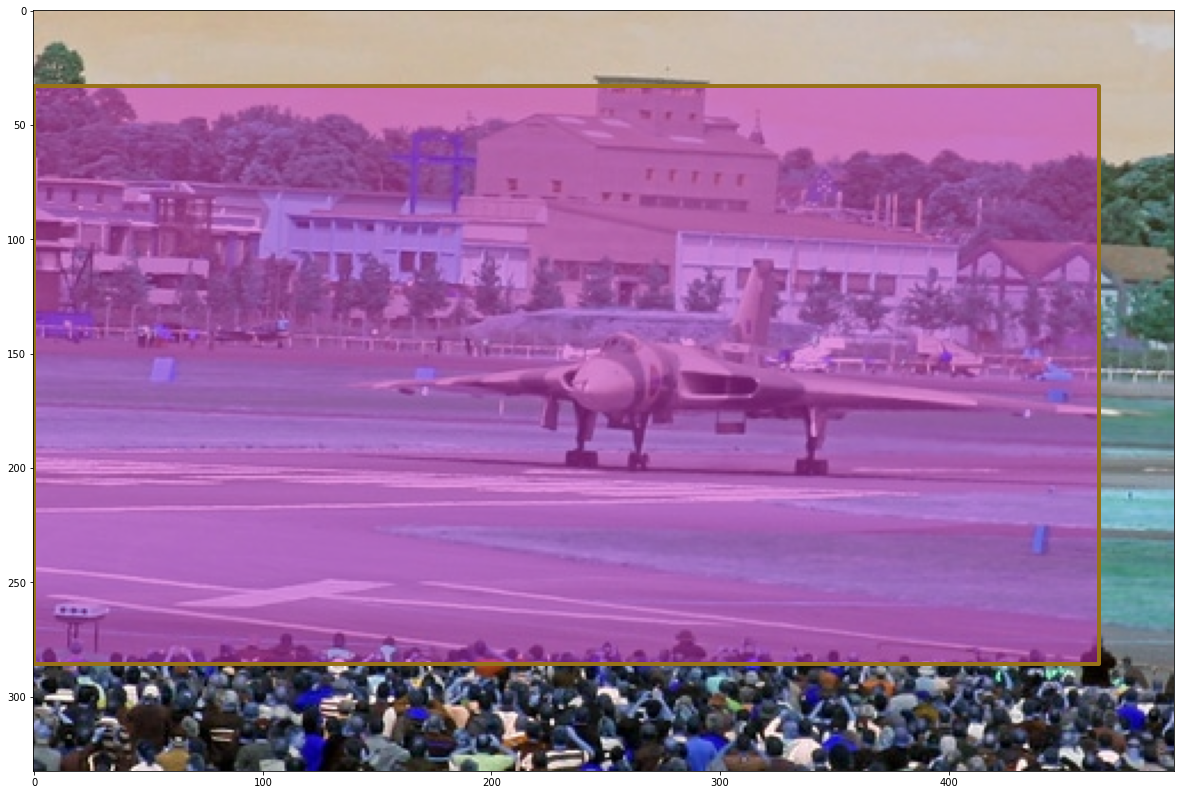

In [184]:
visualize('/content/mmdetections/data/shapes', '11.jpg')

In [ ]:

def visualize_all(directory, fname):
    path_img = os.path.join(directory, fname)
#     real_fname = dict_imageid_to_fname[int(fname[:-4])]
    real_fname = fname
    print(real_fname)
    img = mmcv.imread(path_img)
    real_img = plt.imread(os.path.join(directory, real_fname))
    plt.figure(figsize=(34,14))
    plt.imshow(img)
    result = inference_detector(model, path_img)
#     print(result)
    dict_edgecolors={}
    rects = []
    legend_rects = []
    legend_cls = []
    for idx_req_field in range(len(model.CLASSES)):
        if result[0][idx_req_field].any():
            class_name = model.CLASSES[idx_req_field]
            for i in result[0][idx_req_field]:
                if i[4]<0.277:
                    continue
                x1, y1, x2, y2, prob = i
                print(x1, y1, x2, y2)
                print(class_name, prob)
                rect = Rectangle((x1,y1), x2-x1, y2-y1, facecolor='#4b006e8f',lw=4, edgecolor='g')
                rects.append(rect)
            legend_rect = Rectangle((0,0),1,1,facecolor='g')
            legend_rects.append(legend_rect)
            legend_cls.append(class_name)
        
    p = PatchCollection(rects,match_original=True)
    fig, ax = plt.subplots(1,figsize=(50,30))
    ax.add_collection(p)
    ax.legend(legend_rects, legend_cls, loc=3)
    ax.imshow(img)

11.jpg
0.0 33.008926 465.75964 285.82135
plane 0.28342396


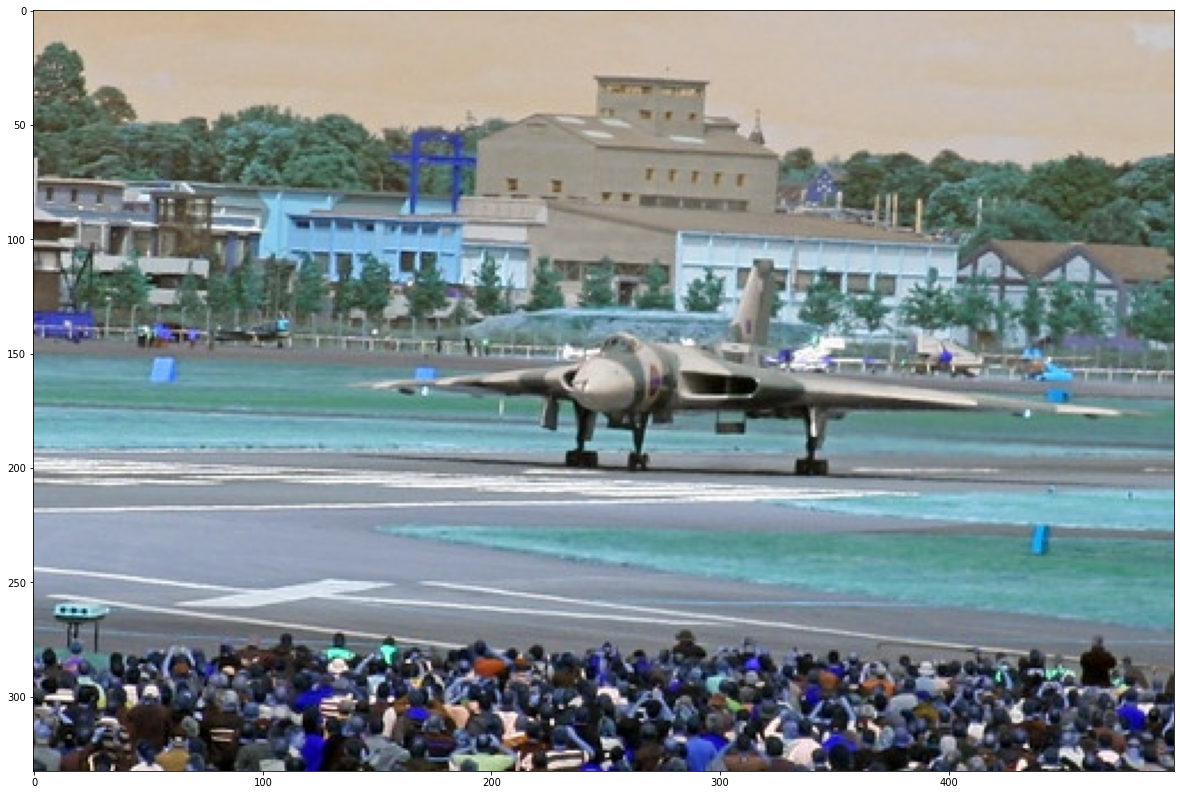

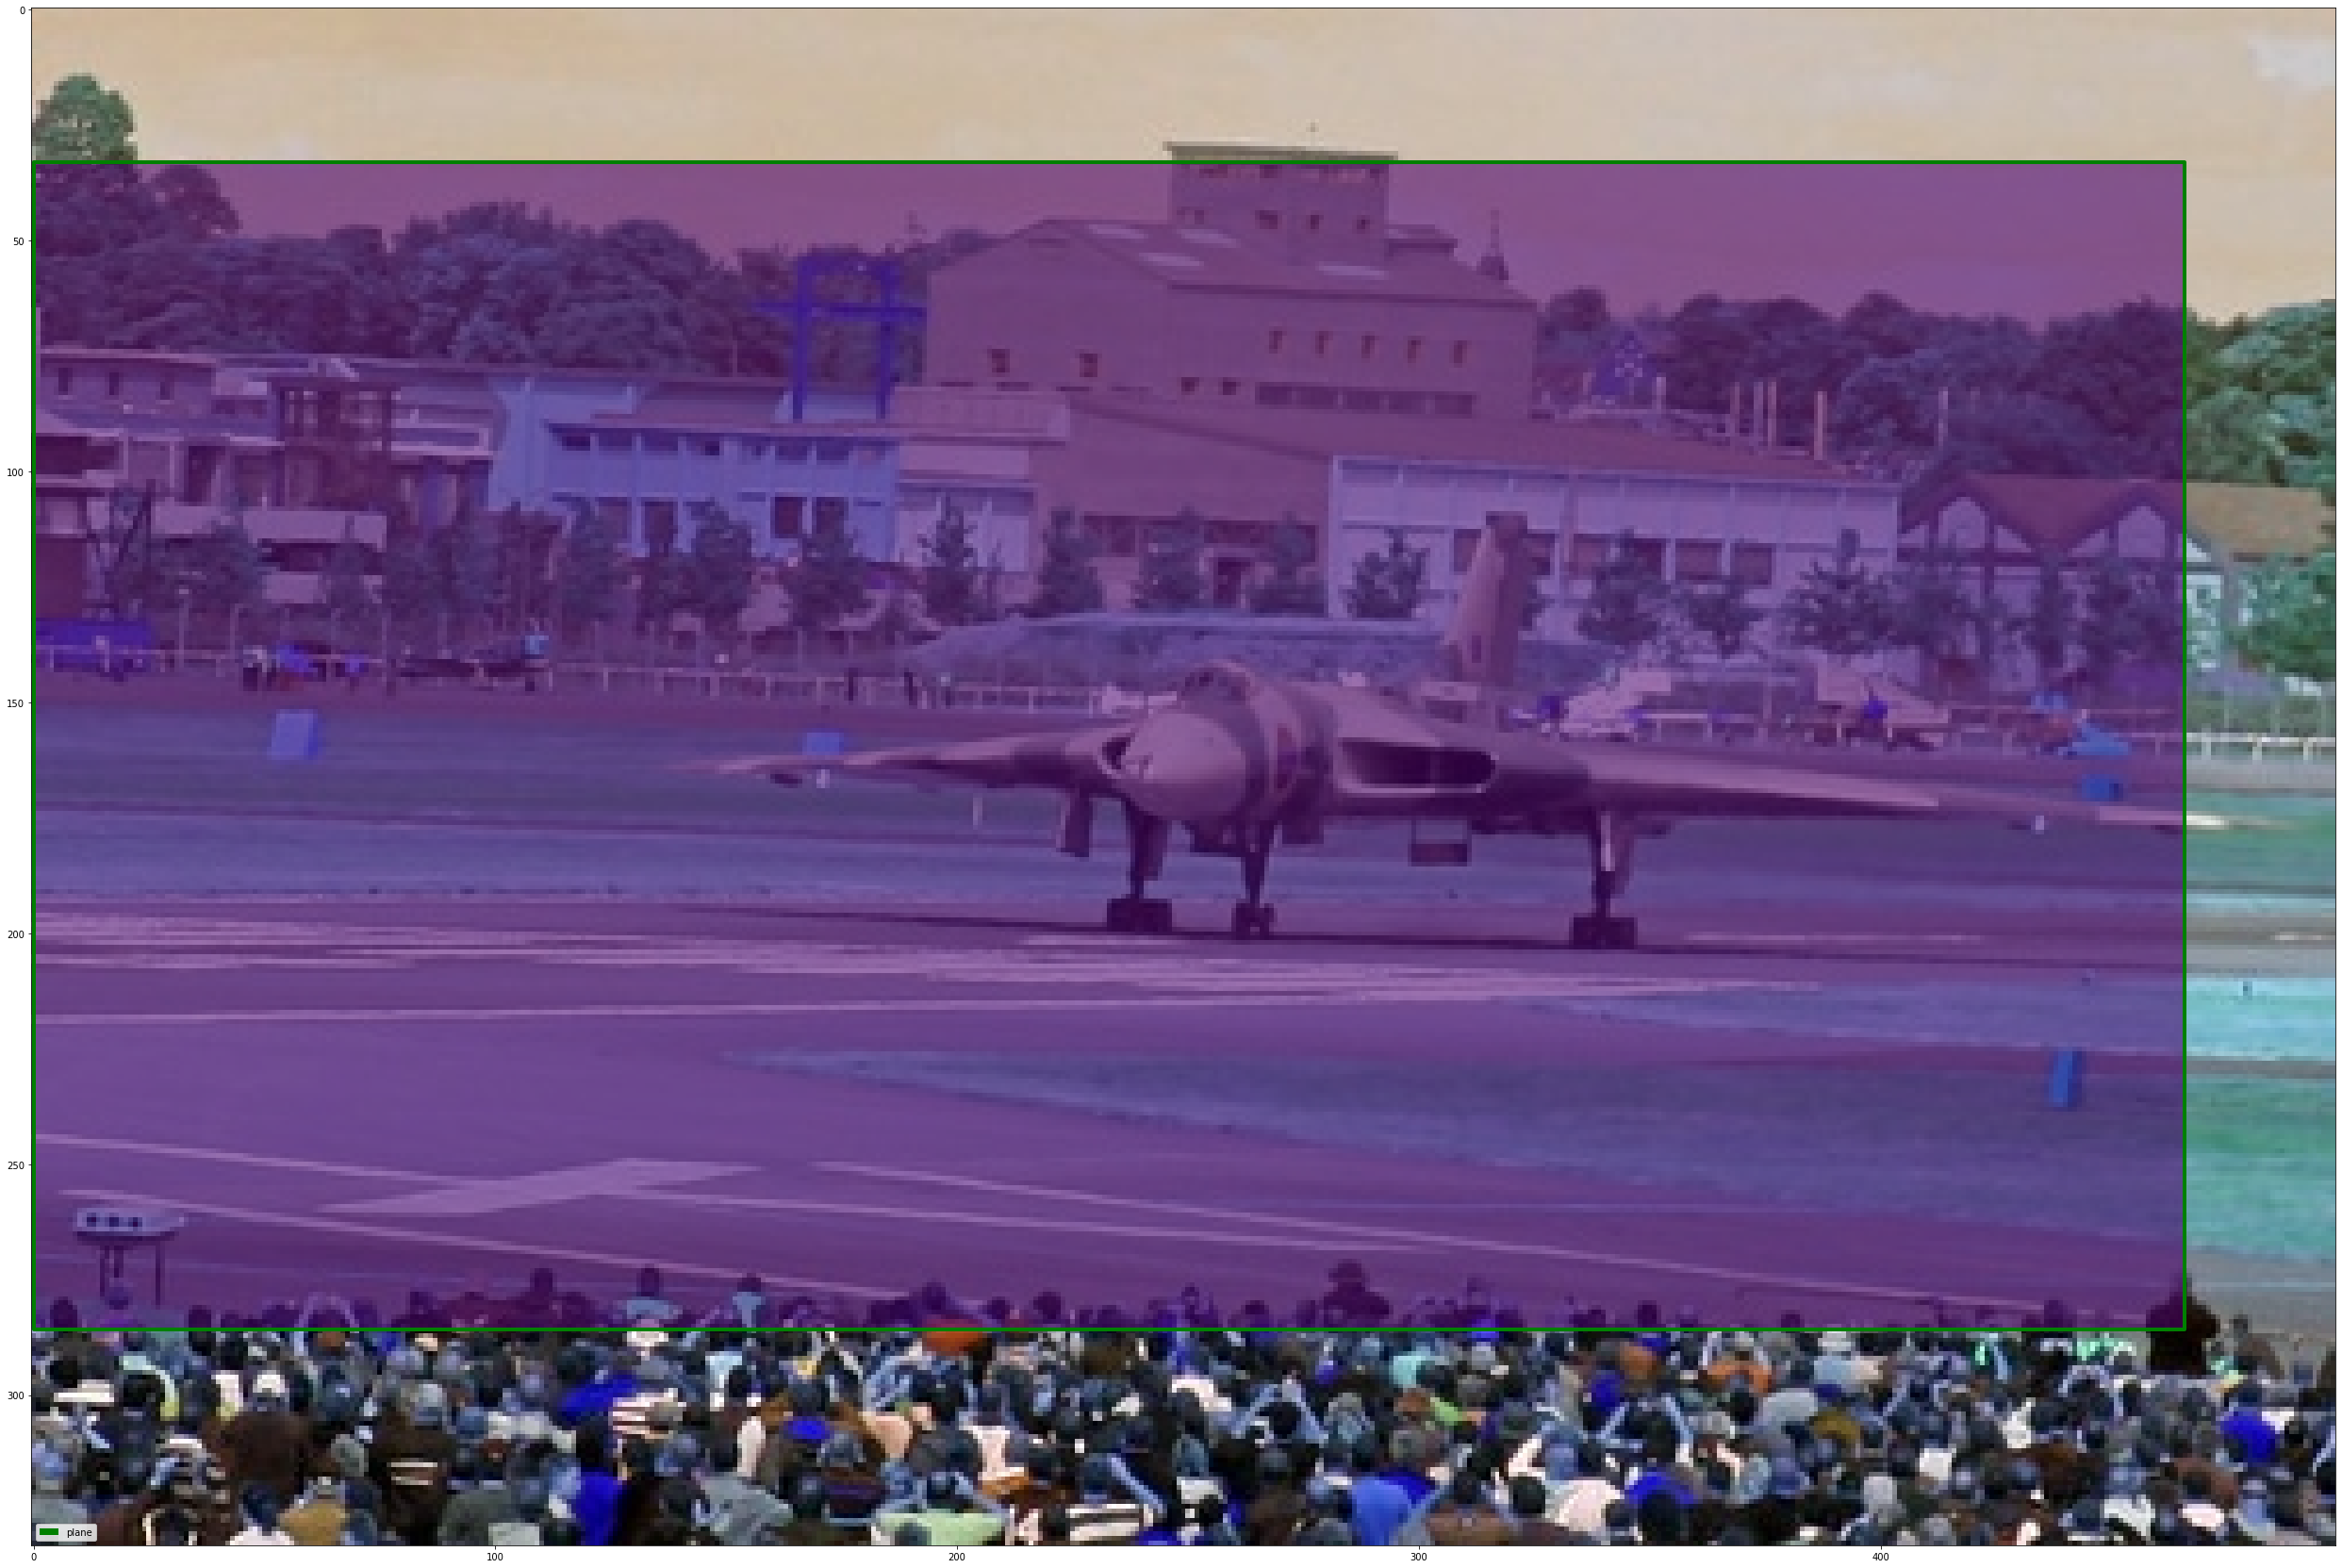

In [189]:
# fname = '13.png'
visualize_all('/content/mmdetections/data/shapes', '11.jpg')

In [ ]:
# %cd /content

In [ ]:
# !zip -r mmdetection_object_detection_colab.zip mmdetections/

In [ ]:
# from google.colab import drive
# drive.mount('/gdrive')

In [ ]:
# %cd /gdrive/
# !ls

In [ ]:
# %cd /content/

In [ ]:
# !gsutil cp -r mmdetections/ /gdrive/'My Drive'

In [ ]:
from google.colab import files

files.download(config_fname)
